In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("trainingdata2010-2020.csv")
test= pd.read_csv("testingdata2021.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [5]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.05939779],
       [0.05853804],
       [0.05363807],
       ...,
       [0.95816939],
       [0.94478184],
       [0.95498282]])

In [6]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

In [8]:
model = Sequential()


model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')  # Compile model

In [9]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 59s 328ms/step - loss: 0.0544 - mean_absolute_error: 0.1642
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 43s 366ms/step - loss: 0.0064 - mean_absolute_error: 0.0535
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - loss: 0.0048 - mean_absolute_error: 0.0473
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 358ms/step - loss: 0.0045 - mean_absolute_error: 0.0451
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 32s 376ms/step - loss: 0.0043 - mean_absolute_error: 0.0449
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - loss: 0.0038 - mean_absolute_error: 0.0407
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 39s 462ms/step - loss: 0.0035 - mean_absolute_error: 0.0405 
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 446ms/step - loss: 0.0033 - mean_absolute_error: 0.0386
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 471ms/step - loss: 0.0031 - mean_absolute_error: 0.0374
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - loss: 0.0033 - mean_absolute_error: 0.0378
Epoch 11

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step 
Skipping inverse transform: Data may already be in original scale.
Mean Absolute Error (MAE): 0.0436
Root Mean Squared Error (RMSE): 0.0536
R² Score: 0.9460


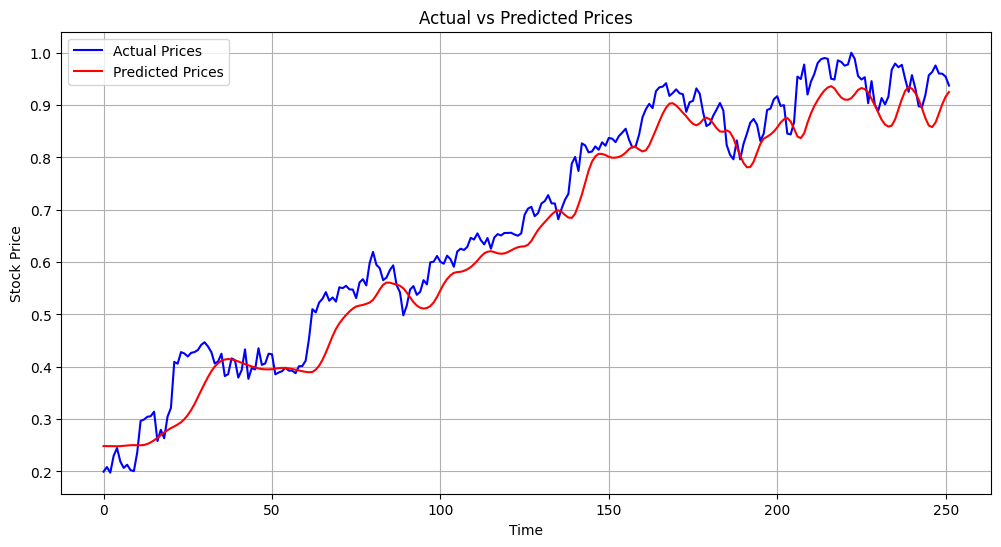

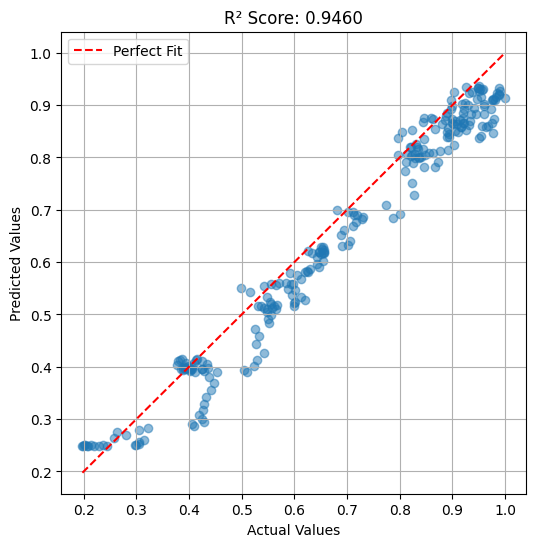

In [18]:
# Ensure the same scaler is used for test data
test_df = pd.DataFrame(test_close)
past_100_days = pd.DataFrame(train_close[-100:])
# final_df = pd.concat([train.iloc[-100:, 4:5], test_df], ignore_index=True)  # Keep last 100 days from train
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
# Transform using the previously fitted scaler (do not re-fit)

input_data = scaler.fit_transform(final_df)
# input_data = scaler.transform(final_df)


# Prepare x_test and y_test
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Predict and inverse transform results
y_pred = model.predict(x_test)

# Step 2: Insert My Code Here
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'scaler' is correctly defined and used
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# If 'scaler' was previously used to transform data, apply inverse transformation
try:
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
except:
    print("Skipping inverse transform: Data may already be in original scale.")

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for R² visualization
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R² Score: {r2:.4f}")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
scaler.scale_

scale_factor = 1/0.01259938
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

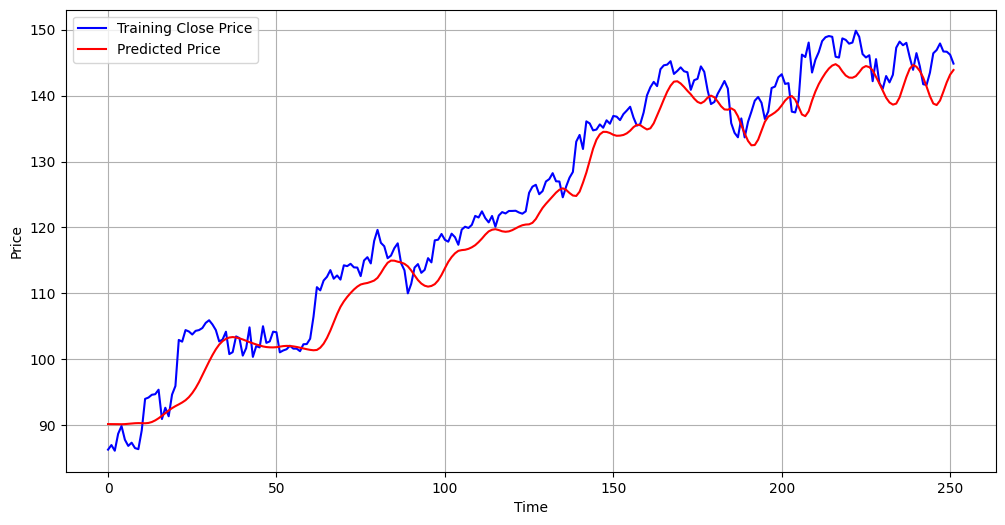

In [13]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Training Close Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 2.79%


In [15]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9460226219301343


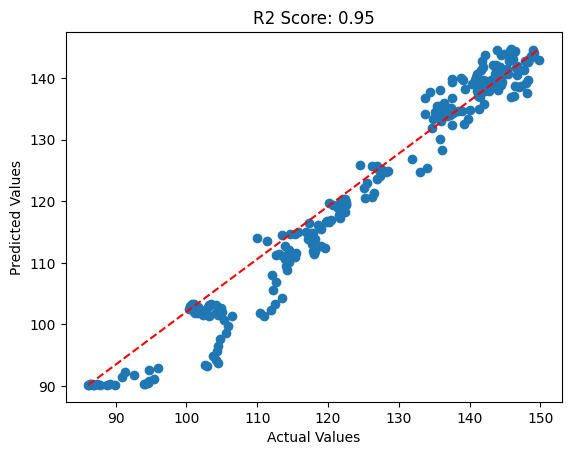

In [16]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()